# Peter and the Wolf: Reinforcement Learning Primer

In this tutorial, we will learn how to apply Reinforcement Learning to a pathfinding problem. The scenario is inspired by [Peter and the Wolf](https://en.wikipedia.org/wiki/Peter_and_the_Wolf), a musical fairy tale by Russian composer [Sergei Prokofiev](https://en.wikipedia.org/wiki/Sergei_Prokofiev). It tells the story of young pioneer Peter, who bravely ventures out of his house to a forest clearing to chase a wolf. We will train machine learning algorithms to help Peter explore the surrounding area and create an optimal navigation map.

First, let's import a set of useful libraries:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Overview of Reinforcement Learning

**Reinforcement Learning** (RL) is a learning method that enables us to determine the optimal behavior of an **agent** within a specific **environment** by conducting numerous experiments. The agent in this environment should have a **goal**, which is defined by a **reward function**.

## The Environment

To simplify things, let's imagine Peter's world as a square board with dimensions `width` x `height`. Each cell on this board can be one of the following:
* **ground**, where Peter and other creatures can walk
* **water**, which is obviously impassable
* **a tree** or **grass** - a spot where you can take a break
* **an apple**, which Peter would be happy to find to satisfy his hunger
* **a wolf**, which is dangerous and should be avoided

To interact with the environment, we will define a class called `Board`. To keep this notebook concise, all the code related to working with the board has been moved to a separate module called `rlboard`, which we will now import. You can explore this module for more details about the implementation.


Let's now create a random board and see how it looks:


In [4]:
# code block 1

## Actions and Policy

In our example, Peter's goal is to find an apple while avoiding the wolf and other obstacles. Define these actions as a dictionary and link them to pairs of corresponding coordinate changes.


In [5]:
# code block 2

The strategy of our agent (Peter) is defined by what is known as a **policy**. Let's take a look at the simplest policy, called **random walk**.

## Random walk

We'll start by addressing our problem using the random walk strategy.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Reward Function

To make our policy smarter, we need to identify which actions are "better" than others.


In [8]:
#code block 5

## Q-Learning

Create a Q-Table, or a multi-dimensional array. Since our board has dimensions `width` x `height`, we can represent the Q-Table using a numpy array with the shape `width` x `height` x `len(actions)`:


In [9]:
# code block 6

Pass the Q-Table to the `plot` function in order to visualize the table on the board:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Essence of Q-Learning: Bellman Equation and Learning Algorithm

Write a pseudo-code for our learning algorithm:

* Initialize Q-Table Q with equal values for all states and actions
* Set learning rate $\alpha\leftarrow 1$
* Repeat simulation many times
   1. Start at a random position
   1. Repeat
        1. Select an action $a$ at state $s$
        2. Execute the action by moving to a new state $s'$
        3. If we encounter an end-of-game condition, or the total reward is too small - exit simulation  
        4. Compute reward $r$ at the new state
        5. Update the Q-Function according to the Bellman equation: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. Update the total reward and decrease $\alpha$.

## Exploit vs. Explore

The best approach is to strike a balance between exploration and exploitation. As we learn more about our environment, we are more likely to follow the optimal path, but occasionally choosing an unexplored route can be beneficial.

## Python Implementation

Now we are ready to implement the learning algorithm. Before that, we also need a function that will convert arbitrary numbers in the Q-Table into a vector of probabilities for corresponding actions:


In [10]:
# code block 7

We add a small amount of `eps` to the original vector to prevent division by zero in the initial scenario, where all components of the vector are the same.

The learning algorithm itself will be executed for 5000 experiments, also known as **epochs**:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

After executing this algorithm, the Q-Table should be updated with values that define the attractiveness of different actions at each step. Visualize the table here:


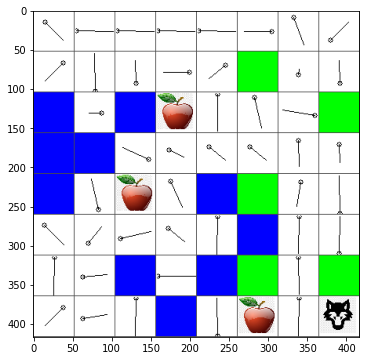

In [43]:
m.plot(Q)

## Checking the Policy

Since the Q-Table indicates the "desirability" of each action for every state, it becomes straightforward to use it to determine the optimal path in our environment. In the simplest scenario, we can simply choose the action associated with the highest value in the Q-Table:


In [13]:
# code block 9

2

If you try the code above several times, you may notice that sometimes it just "hangs", and you need to press the STOP button in the notebook to interrupt it.

> **Task 1:** Adjust the `walk` function to set a maximum path length, for example, 100 steps, and observe how the code above occasionally returns this value.

> **Task 2:** Update the `walk` function so that it avoids revisiting locations it has already been to. This will stop `walk` from looping, though the agent might still get "stuck" in a spot it cannot leave.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


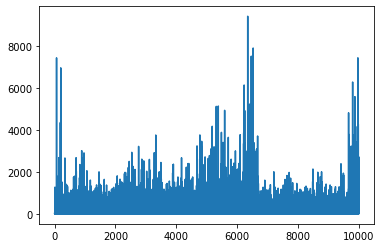

In [57]:
plt.plot(lpath)

## Exercise
## A more realistic Peter and the Wolf world



---

**Disclaimer**:  
This document has been translated using the AI translation service [Co-op Translator](https://github.com/Azure/co-op-translator). While we aim for accuracy, please note that automated translations may include errors or inaccuracies. The original document in its native language should be regarded as the authoritative source. For critical information, professional human translation is advised. We are not responsible for any misunderstandings or misinterpretations resulting from the use of this translation.
